In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

/Users/MHK/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
delta_data = pd.read_csv('full_m5delta.csv', parse_dates = [0])

In [3]:
deltaseas_train = pd.read_csv('deltaseas_train')
deltaseas_cv = pd.read_csv('deltaseas_cv')
deltaseas_test = pd.read_csv('deltaseas_test')

In [4]:
deltaseas_train.set_index('Unnamed: 0',inplace=True)
deltaseas_cv.set_index('Unnamed: 0',inplace=True)
deltaseas_test.set_index('Unnamed: 0',inplace=True)

In [5]:
del deltaseas_train.index.name
del deltaseas_cv.index.name
del deltaseas_test.index.name

In [6]:
deltaseas_train.index = pd.to_datetime(deltaseas_train.index)
deltaseas_cv.index = pd.to_datetime(deltaseas_cv.index)
deltaseas_test.index = pd.to_datetime(deltaseas_test.index)

In [7]:
delta_data.set_index('Unnamed: 0',inplace=True)

In [8]:
del delta_data.index.name

In [9]:
delta_data.index = pd.to_datetime(delta_data.index)

In [10]:
# creating seasonally differenced daily data
delta_day = delta_data.resample('D').sum()
delta_day = delta_day['2015':]

In [11]:
delta_day

,delta
2015-01-01,0.0
2015-01-02,0.0
2015-01-03,0.0
2015-01-04,0.0
2015-01-05,0.0
2015-01-06,0.0
2015-01-07,0.0
2015-01-08,0.0
2015-01-09,0.0
2015-01-10,0.0


(-1000, 3000)

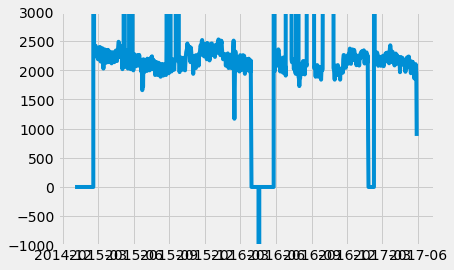

In [12]:
plt.plot(delta_day.index,delta_day.delta)
plt.ylim([-1000,3000])

In [13]:
delta_np = np.array(delta_day.delta)

In [14]:
add = delta_np[7:]
subtract = delta_np[:-7]

In [15]:
deltaseas_np = add-subtract

In [16]:
deltaday_seas = pd.DataFrame(deltaseas_np)

In [17]:
deltaday_seas.rename(columns = {0:'delta'},inplace=True)
deltaday_seas.index = delta_day.index[7:]
deltaday_seas

,delta
2015-01-08,0.0
2015-01-09,0.0
2015-01-10,0.0
2015-01-11,0.0
2015-01-12,0.0
2015-01-13,0.0
2015-01-14,0.0
2015-01-15,0.0
2015-01-16,0.0
2015-01-17,0.0


(-500, 500)

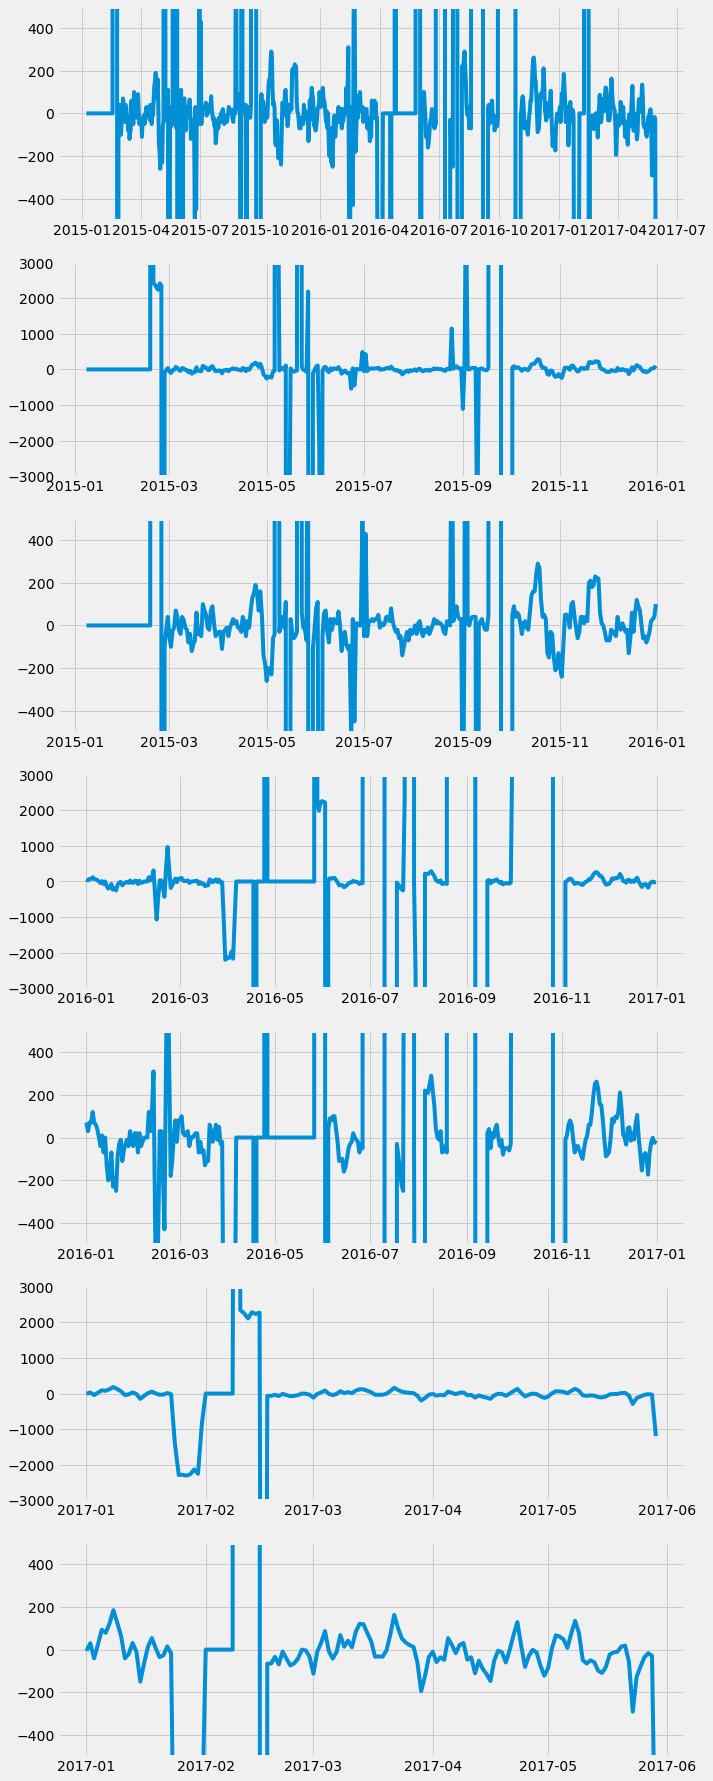

In [18]:
# Check if seasonal differenced data looks stationary
plt.figure(figsize =[10,30])

plt.subplot(711)
plt.plot(deltaday_seas.index,deltaday_seas.delta)
plt.ylim([-500,500])

plt.subplot(712)
plt.plot(deltaday_seas['2015'].index,deltaday_seas['2015'].delta)
plt.ylim([-3000,3000])

plt.subplot(713)
plt.plot(deltaday_seas['2015'].index,deltaday_seas['2015'].delta)
plt.ylim([-500,500])

plt.subplot(714)
plt.plot(deltaday_seas['2016'].index,deltaday_seas['2016'].delta)
plt.ylim([-3000,3000])

plt.subplot(715)
plt.plot(deltaday_seas['2016'].index,deltaday_seas['2016'].delta)
plt.ylim([-500,500])

plt.subplot(716)
plt.plot(deltaday_seas['2017'].index,deltaday_seas['2017'].delta)
plt.ylim([-3000,3000])

plt.subplot(717)
plt.plot(deltaday_seas['2017'].index,deltaday_seas['2017'].delta)
plt.ylim([-500,500])

In [19]:
# Still, some signs of seasonality exist - use first order differencing also
deltaday_diff = deltaday_seas - deltaday_seas.shift(1)
deltaday_diff = deltaday_diff.iloc[1:]

(-500, 500)

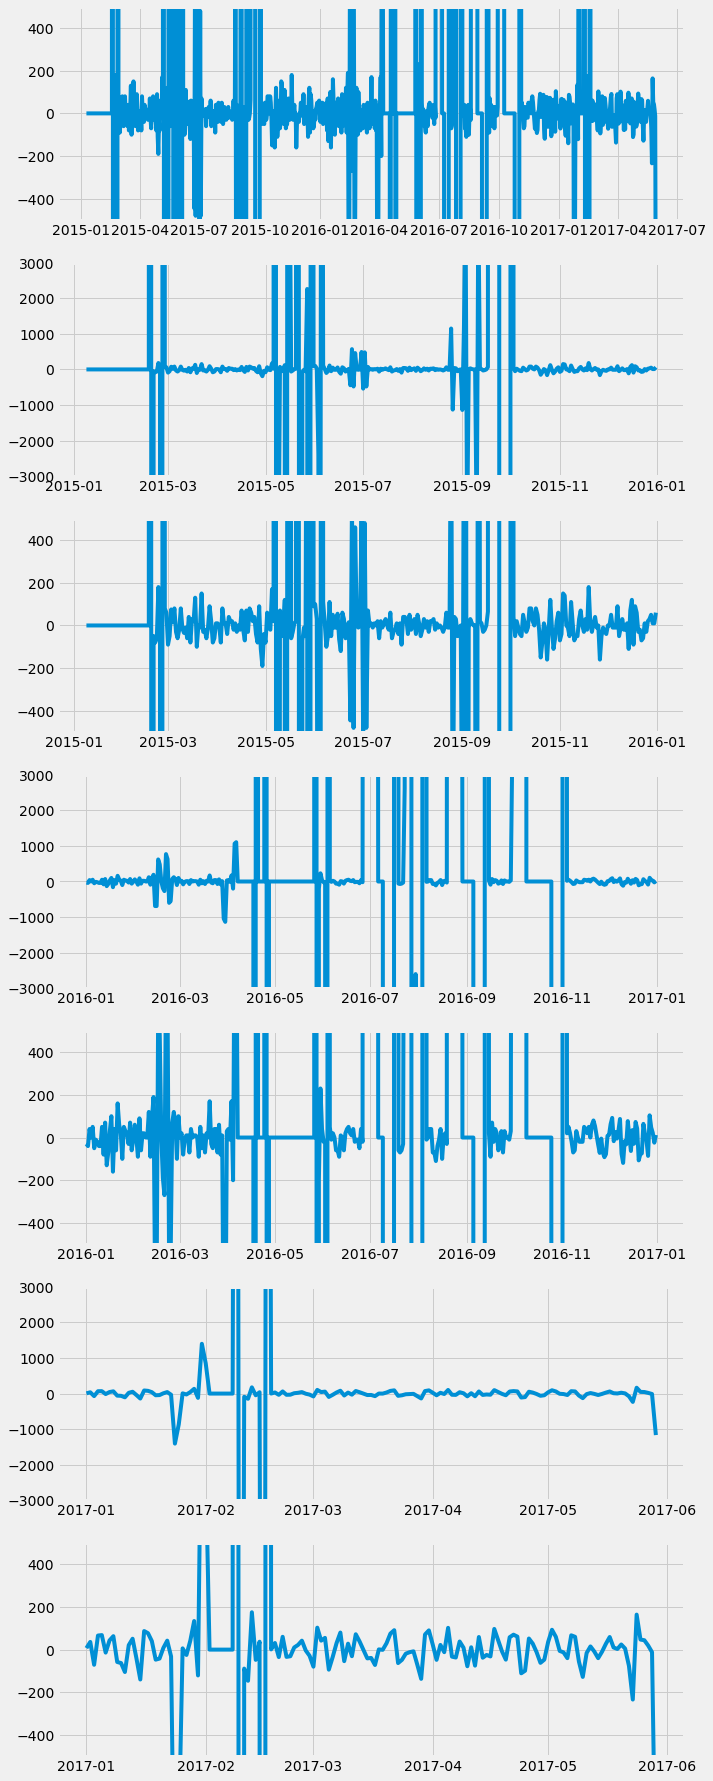

In [20]:
# Check if seasonal and first order differenced data looks stationary
plt.figure(figsize =[10,30])

plt.subplot(711)
plt.plot(deltaday_diff.index,deltaday_diff.delta)
plt.ylim([-500,500])

plt.subplot(712)
plt.plot(deltaday_diff['2015'].index,deltaday_diff['2015'].delta)
plt.ylim([-3000,3000])

plt.subplot(713)
plt.plot(deltaday_diff['2015'].index,deltaday_diff['2015'].delta)
plt.ylim([-500,500])

plt.subplot(714)
plt.plot(deltaday_diff['2016'].index,deltaday_diff['2016'].delta)
plt.ylim([-3000,3000])

plt.subplot(715)
plt.plot(deltaday_diff['2016'].index,deltaday_diff['2016'].delta)
plt.ylim([-500,500])

plt.subplot(716)
plt.plot(deltaday_diff['2017'].index,deltaday_diff['2017'].delta)
plt.ylim([-3000,3000])

plt.subplot(717)
plt.plot(deltaday_diff['2017'].index,deltaday_diff['2017'].delta)
plt.ylim([-500,500])

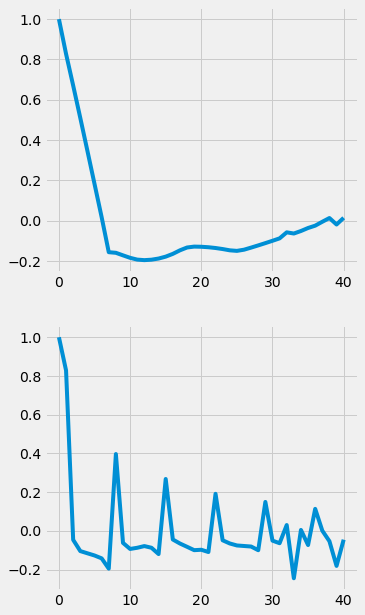

In [21]:
# ACF PACF for only seasonally differenced data:

from statsmodels.tsa.stattools import acf, pacf

plt.figure(figsize=[5,10])
plt.subplot(211)
plt.plot(np.arange(41),acf(deltaday_seas.delta,nlags=40))
plt.subplot(212)
plt.plot(np.arange(41),pacf(deltaday_seas.delta,nlags=40))

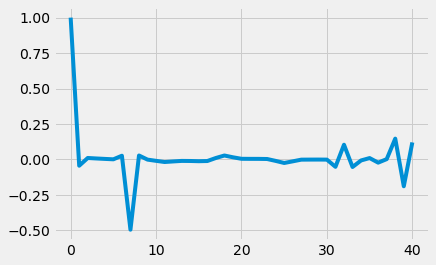

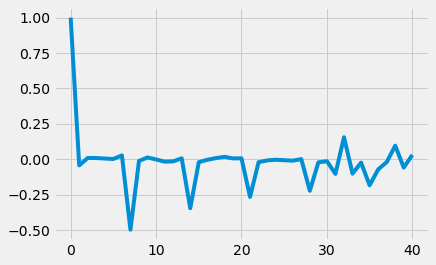

In [22]:
# visualize acf and pacf for double differenced data to determine arima...
# .. model params

from statsmodels.tsa.stattools import acf,pacf

"""
tsarray = np.array(deltaday_diff)

acfdf = pd.DataFrame()
pacf = pd.DataFrame()
acfdf['acf'] = acf(deltaday_diff.delta,nlags = 400)
"""

plt.figure()
plt.plot(np.arange(41),acf(list(deltaday_diff.delta),nlags = 40))
plt.figure()
plt.plot(np.arange(41),pacf(list(deltaday_diff.delta),nlags = 40))

In [23]:
# ACF at lag-1 is negative AND there is a sharp cutoff after lag-7 
# Therefore, MA terms should be added to the model - 7 MA terms 
# Since autocorrelation (ACF) of double diff data has negative corr at ...
# ... lags = length of seasonal period, add an SMA term as well - not ...
# ... specified what the SMA term should be, so try multiple. 

In [24]:
p = range(0,1)
d = range(1,2)
q = range(0,14)
P = range(0,1)
D = range(1,2)
Q = range(0,14)
S = range(7,8)


pdq=list(itertools.product(p,d,q))
seasonalpdq = list(itertools.product(P,D,Q,S))

In [25]:
# The following code is commented out so it isn't run by mistake, ...
# ... since run time is too long. 
# Results of following code: increasing SMA term decreases AIC, therefore...
# ...MA term is kept at 7 as suggested by acf, but SMA term should be ...
# ...be determined by trying larger range of values in next code steps. 
'''
# try ARIMA(0,1,[0:14])x(0,1,[0:14],7)
warnings.filterwarnings('ignore')

for pdq_order in pdq:
    for seasonal_pdq in seasonalpdq:
        try:
            arima1 = sm.tsa.statespace.SARIMAX(deltaday_diff,
                                order= pdq_order,
                                seasonal_order = seasonal_pdq,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
            results1 = arima1.fit()
            print('ARIMA{}x{}: AIC={}'.format(pdq_order,seasonal_pdq,results1.aic))
        except:
            continue
'''

"\n# try ARIMA(0,1,[0:14])x(0,1,[0:14],7)\nwarnings.filterwarnings('ignore')\n\nfor pdq_order in pdq:\n    for seasonal_pdq in seasonalpdq:\n        try:\n            arima1 = sm.tsa.statespace.SARIMAX(deltaday_diff,\n                                order= pdq_order,\n                                seasonal_order = seasonal_pdq,\n                                enforce_stationarity=False,\n                                enforce_invertibility=False)\n            results1 = arima1.fit()\n            print('ARIMA{}x{}: AIC={}'.format(pdq_order,seasonal_pdq,results1.aic))\n        except:\n            continue\n"

In [26]:
for i in range(0,7):
    print('value of i: {}'.format(i))

value of i: 0
value of i: 1
value of i: 2
value of i: 3
value of i: 4
value of i: 5
value of i: 6


In [27]:
# separate into train-cv-test sets, and then apply the best model based on AICs

train_size = int(deltaday_diff.shape[0]*(75/100))

daydiff_train_prelim = deltaday_diff.iloc[:train_size]

daydiff_test = deltaday_diff.iloc[train_size:]

train_size = int(train_size*0.75)

daydiff_train = daydiff_train_prelim.iloc[:train_size]
daydiff_cv = daydiff_train_prelim.iloc[train_size:]

In [28]:
# verify that no rows left out. 
daydiff_train.shape[0]+daydiff_cv.shape[0]+daydiff_test.shape[0]-deltaday_diff.shape[0]

0

In [29]:
daydiff_train

,delta
2015-01-09,0.0
2015-01-10,0.0
2015-01-11,0.0
2015-01-12,0.0
2015-01-13,0.0
2015-01-14,0.0
2015-01-15,0.0
2015-01-16,0.0
2015-01-17,0.0
2015-01-18,0.0


In [30]:
daydiff_cv

,delta
2016-05-13,0.000000e+00
2016-05-14,0.000000e+00
2016-05-15,0.000000e+00
2016-05-16,0.000000e+00
2016-05-17,0.000000e+00
2016-05-18,0.000000e+00
2016-05-19,0.000000e+00
2016-05-20,0.000000e+00
2016-05-21,0.000000e+00
2016-05-22,0.000000e+00


In [31]:
daydiff_test

,delta
2016-10-24,1.862645e-09
2016-10-25,5.587935e-09
2016-10-26,-3.873539e+06
2016-10-27,-1.156648e+07
2016-10-28,-5.801701e+05
2016-10-29,-5.801901e+05
2016-10-30,-5.802601e+05
2016-10-31,-5.799501e+05
2016-11-01,-5.801001e+05
2016-11-02,3.293409e+06


In [32]:
# Trying different ARIMA models by varying x in:
# SARIMAX(0,1,7)x(0,1,x,7) from 7 to 30

p_new = range(0,1)
d_new = range(1,2)
q_new = range(7,8)
pdq_new = list(itertools.product(p_new,d_new,q_new))

P_new = range(0,1)
D_new = range(1,2)
Q_new = range(7,30)
S_new = range(7,8)
seasonalpdq_new = list(itertools.product(P_new,D_new,
                                         Q_new,S_new))

In [33]:
# Model ARIMA(0,1,7)x(0,1,13,7) has least AIC on training set of 11621

In [34]:
mod2 = sm.tsa.statespace.SARIMAX(daydiff_train,
                                 order = (0,1,7),
                                 seasonal_order = (0,1,13,7),
                                 enforce_stationarity = False,
                                 enforce_invertibility = False)
arima2 = mod2.fit()

/Users/MHK/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [35]:
print(arima2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0219      0.067    -15.301      0.000      -1.153      -0.891
ma.L2          0.3563      0.169      2.106      0.035       0.025       0.688
ma.L3          0.2650      0.185      1.435      0.151      -0.097       0.627
ma.L4          0.0037      0.157      0.024      0.981      -0.305       0.312
ma.L5         -0.0968      0.182     -0.530      0.596      -0.454       0.261
ma.L6          0.2544      0.167      1.526      0.127      -0.072       0.581
ma.L7         -0.5388      0.181     -2.969      0.003      -0.894      -0.183
ma.S.L7       -2.0730      0.135    -15.313      0.000      -2.338      -1.808
ma.S.L14       1.2385      0.372      3.333      0.001       0.510       1.967
ma.S.L21      -0.1556      0.640     -0.243      0.808      -1.411       1.100
ma.S.L28       0.0239      0.743      0.032      0.9

In [36]:
"""
The arima2 model summary above shows model parameters' coefficients, 
which in turn show what the ARIMA equation looks like. 
The P>z values show significance of each feature weight/coeff of parameters.
In other words, the P-values of the feature weights.
Since some/most are >0.05 (significance level), they must not be retained
in the model.
"""

"\nThe arima2 model summary above shows model parameters' coefficients, \nwhich in turn show what the ARIMA equation looks like. \nThe P>z values show significance of each feature weight/coeff of parameters.\nIn other words, the P-values of the feature weights.\nSince some/most are >0.05 (significance level), they must not be retained\nin the model.\n"

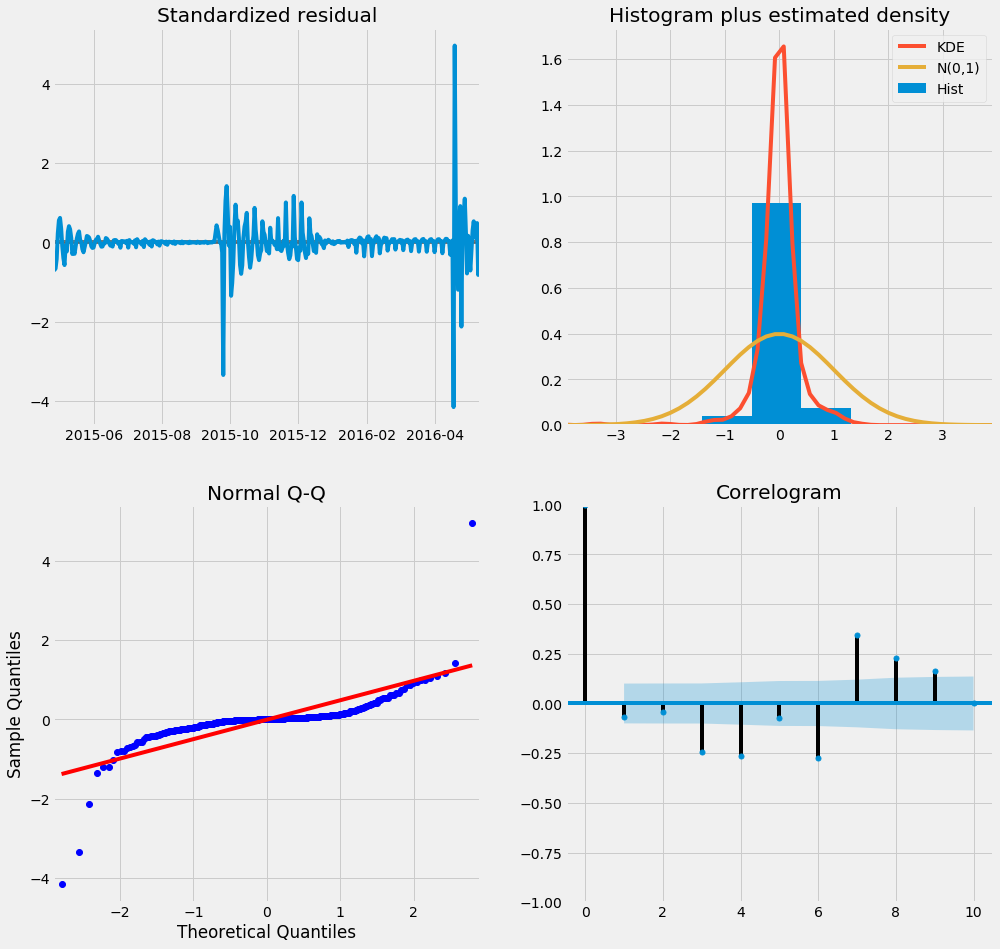

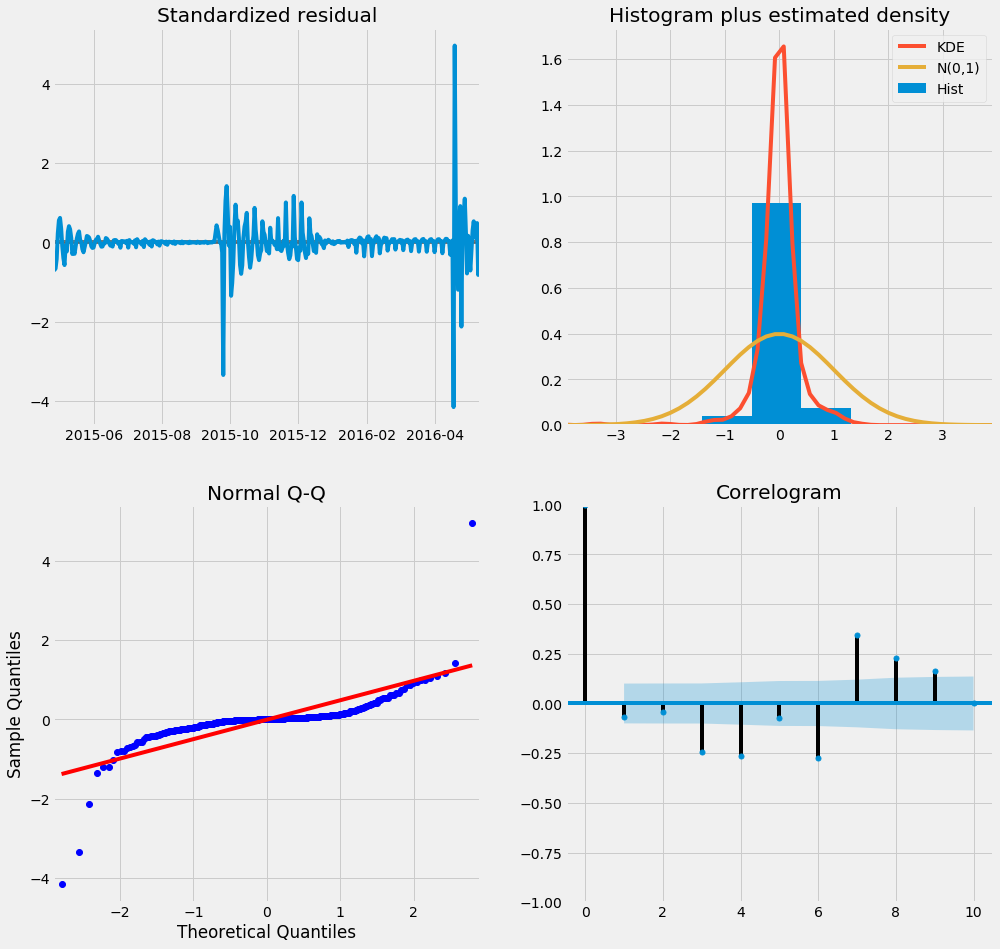

In [37]:
arima2.plot_diagnostics(figsize=[15,15])

In [38]:
"""
Plot diagnostics don't show good signs because:
- Residuals are normally distributed (top right plot), have a mean
    of zero, but std dev of less than one. 
- Residuals appear to show some seasonality (top left plot) and do not
    appear as white noise
- Seasonality of residuals is confirmed in correlogram in bottom right; 
    the autocorrelation at lags 3, 4, 6, 7, 8 are significantly greater than
    the allowed amount (light blue shaded area).
 Next steps:
- First check what the predictions are like of the current model
- Change model params to see how many terms would be good to use. 
- Find out how to remove seasonality of the residuals. 
"""

"\nPlot diagnostics don't show good signs because:\n- Residuals are normally distributed (top right plot), have a mean\n    of zero, but std dev of less than one. \n- Residuals appear to show some seasonality (top left plot) and do not\n    appear as white noise\n- Seasonality of residuals is confirmed in correlogram in bottom right; \n    the autocorrelation at lags 3, 4, 6, 7, 8 are significantly greater than\n    the allowed amount (light blue shaded area).\n Next steps:\n- First check what the predictions are like of the current model\n- Change model params to see how many terms would be good to use. \n- Find out how to remove seasonality of the residuals. \n"

In [39]:
import datetime

In [40]:
daydiff_train.index = pd.to_datetime(daydiff_train.index, format = '%Y-%m-%d')
daydiff_test.index = pd.to_datetime(daydiff_test.index, format = '%Y-%m-%d')
daydiff_cv.index = pd.to_datetime(daydiff_cv.index, format = '%Y-%m-%d')

In [41]:
daydiff_train['date']=daydiff_train.index
daydiff_cv['date']=daydiff_cv.index
daydiff_test['date']=daydiff_test.index



/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [42]:
def givemedate(datetimeval):
    return datetimeval.date()

daydiff_train.index= daydiff_train.date.apply(givemedate)
daydiff_cv.index= daydiff_cv.date.apply(givemedate)
daydiff_test.index= daydiff_test.date.apply(givemedate)

In [43]:
daydiff_cv.index[0]

datetime.date(2016, 5, 13)

In [44]:
def dateonlyreturn (datetimeval):
    return datetime.datetime.strptime(datetime.datetime.strftime(datetimeval,format = '%Y-%m-%d'),'%Y-%m-%d')

In [45]:
predstart_cv = (daydiff_cv.date.iloc[0])
predend_cv = (daydiff_cv.date.iloc[daydiff_cv.shape[0]-1])

In [46]:
predstart_cv

Timestamp('2016-05-13 00:00:00')

In [47]:
predend_cv

Timestamp('2016-10-23 00:00:00')

In [48]:
start_cv=datetime.date(predstart_cv.year,predstart_cv.month,predstart_cv.day)
end_cv = datetime.date(predend_cv.year,predend_cv.month,predend_cv.day)

In [49]:
def converttodate(datetimeval):
    return datetime.date(datetimeval.year,
                  datetimeval.month,
                  datetimeval.day)



In [50]:
start_cv

datetime.date(2016, 5, 13)

In [51]:
daydiff_cv['date'] = daydiff_cv.date.apply(converttodate)
daydiff_cv=daydiff_cv.set_index('date')
del daydiff_cv.index.name

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
prediction_train = arima2.get_prediction(start = '2016-01-01',dynamic=False)
predtrain_ci = prediction_train.conf_int()

In [55]:
daydiff_train

,delta,date
date,,
2015-01-09,0.0,2015-01-09
2015-01-10,0.0,2015-01-10
2015-01-11,0.0,2015-01-11
2015-01-12,0.0,2015-01-12
2015-01-13,0.0,2015-01-13
2015-01-14,0.0,2015-01-14
2015-01-15,0.0,2015-01-15
2015-01-16,0.0,2015-01-16
2015-01-17,0.0,2015-01-17


In [54]:
ax = daydiff_train.delta['2016-01-01':].plot(label='observed')
prediction_train.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(1,1,1)
# ax.plot(daydiff_train.delta['2016-01-01':],label='observed')
# ax.set_ylim([-200000,200000])

# ax.plot(prediction_train.predicted_mean,label='One-step ahead Forecast', alpha=.7)

# ax.set_xlabel('Date')
# ax.set_ylabel('delta - seas and first order differenced')
plt.legend()

TypeError: '>' not supported between instances of 'datetime.date' and 'str'

(-5000, 5000)

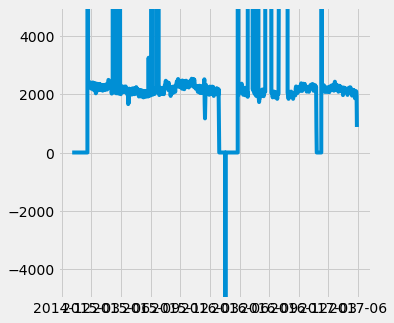

In [61]:
# solution for seasonality of residual:

"""
Nothing concrete exists online - try removing seasonal differencing and 
see if data set is still stationary - won't need to use seasonal diff then.
"""
delta_day.index = pd.to_datetime(delta_day.index,format='%Y-%m-%d')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(delta_day['2015':])
ax.set_ylim([-5000,5000])

# can see that seasonality persists - try 2 first order differences, or ...
# 2 seasonal differences; check stationarity w ADF test for each. 


In [62]:
delta_day.shift(1)

,delta
2015-01-01,NaN
2015-01-02,0.0
2015-01-03,0.0
2015-01-04,0.0
2015-01-05,0.0
2015-01-06,0.0
2015-01-07,0.0
2015-01-08,0.0
2015-01-09,0.0
2015-01-10,0.0


In [63]:
delta_day

,delta
2015-01-01,0.0
2015-01-02,0.0
2015-01-03,0.0
2015-01-04,0.0
2015-01-05,0.0
2015-01-06,0.0
2015-01-07,0.0
2015-01-08,0.0
2015-01-09,0.0
2015-01-10,0.0


In [64]:
deltaday_onediff = delta_day-delta_day.shift(1)

(-500, 500)

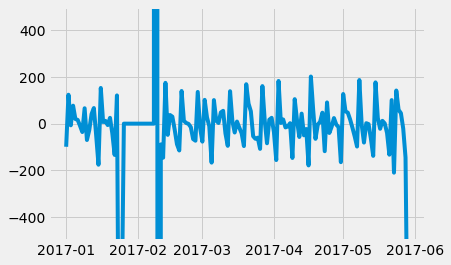

In [65]:
plt.plot(deltaday_onediff['2017':].index,deltaday_onediff['2017':].delta)
plt.ylim(-500,500)

In [66]:
deltaday_twodiff = deltaday_onediff-deltaday_onediff.shift(1)

(-500, 500)

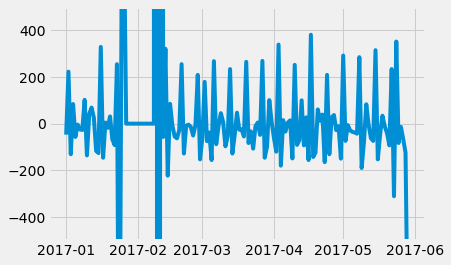

In [67]:
plt.plot(deltaday_twodiff['2017':].index,deltaday_twodiff['2017':].delta)
plt.ylim(-500,500)

In [68]:
from statsmodels.tsa.stattools import adfuller
def adftest(values):
    result = adfuller(values)
    print('ADF Statistic: ',result[0])
    print('p-value: ',result[1])
    print('p-value and ADF Stat key values:\n',result[4])



In [69]:
adftest(deltaday_onediff.delta.values)
# adftest(deltaday_twodiff)


LinAlgError: SVD did not converge

In [70]:
# doesn't look stationary, so do two seas diff.

deltaday_seasone = delta_day - delta_day.shift(7)

(-500, 500)

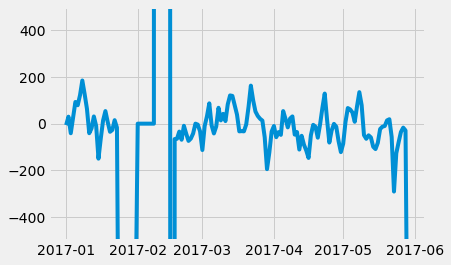

In [71]:
plt.plot(deltaday_seasone['2017':].index,deltaday_seasone['2017':].delta)
plt.ylim(-500,500)

In [72]:
# do another seasonal difference, since doesn't look like there is stationarity

In [73]:
deltaday_seastwo = deltaday_seasone-deltaday_seasone.shift(7)

(-500, 500)

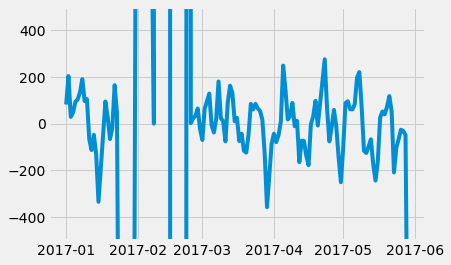

In [74]:
plt.plot(deltaday_seastwo['2017'].index,deltaday_seastwo['2017'].delta)
plt.ylim(-500,500)

In [75]:
deltaday_seasone

,delta
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,0.0
2015-01-09,0.0
2015-01-10,0.0


In [76]:
# either of two first order differencing, or two seasonal differencing does...
# not stationarize the data, therefore, continue with the ARIMA model created, 
# but include exogenous variables. 

In [77]:
dates_df = pd.Series(deltaday_seasone.index)

In [78]:
print(dates_df[0])
dates_df[0].weekday()

2015-01-01 00:00:00


3

In [81]:
daydiff_train

,delta,date
date,,
2015-01-09,0.0,2015-01-09
2015-01-10,0.0,2015-01-10
2015-01-11,0.0,2015-01-11
2015-01-12,0.0,2015-01-12
2015-01-13,0.0,2015-01-13
2015-01-14,0.0,2015-01-14
2015-01-15,0.0,2015-01-15
2015-01-16,0.0,2015-01-16
2015-01-17,0.0,2015-01-17


In [82]:
daydiff_cv

,delta
2016-05-13,0.000000e+00
2016-05-14,0.000000e+00
2016-05-15,0.000000e+00
2016-05-16,0.000000e+00
2016-05-17,0.000000e+00
2016-05-18,0.000000e+00
2016-05-19,0.000000e+00
2016-05-20,0.000000e+00
2016-05-21,0.000000e+00
2016-05-22,0.000000e+00


In [85]:
daydiff_test

,delta,date
2016-10-24,1.862645e-09,2016-10-24
2016-10-25,5.587935e-09,2016-10-25
2016-10-26,-3.873539e+06,2016-10-26
2016-10-27,-1.156648e+07,2016-10-27
2016-10-28,-5.801701e+05,2016-10-28
2016-10-29,-5.801901e+05,2016-10-29
2016-10-30,-5.802601e+05,2016-10-30
2016-10-31,-5.799501e+05,2016-10-31
2016-11-01,-5.801001e+05,2016-11-01
2016-11-02,3.293409e+06,2016-11-02


In [92]:
# creating exog variables and putting in a new df initially for TRAINING

exogtrain_df = pd.DataFrame()
dates_df = pd.Series(daydiff_train.index)

def exog_month(val):
    return val.month

exogtrain_df['Month'] = dates_df.apply(exog_month)

def exog_day(val):
    return val.day

exogtrain_df['Day'] = dates_df.apply(exog_day)

def exog_dayofwk(val):
    return val.weekday()

exogtrain_df['DayOfWk'] = dates_df.apply(exog_dayofwk)




In [120]:

def summerwinter(val):
    if (val.month == 9):
        return 1
    elif (val.month == 10):
        return 1
    elif (val.month == 11):
        return 1
    elif (val.month == 12):
        return 1
    elif (val.month == 1):
        return 1
    elif (val.month == 2):
        return 1
    elif (val.month == 3):
        return 1
    elif (val.month == 4):
        return 1
    else:
        return 2

exogtrain_df['FW/Summer'] = dates_df.apply(summerwinter)

In [115]:
exogtrain_df

,Month,Day,DayOfWk,FW/Summer
0,1,9,4,2
1,1,10,5,2
2,1,11,6,2
3,1,12,0,2
4,1,13,1,2
5,1,14,2,2
6,1,15,3,2
7,1,16,4,2
8,1,17,5,2
9,1,18,6,2


In [97]:
help(np.ndarray)

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  the methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optiona

In [122]:
exogtrain_array = np.array(exogtrain_df)

In [123]:
print(daydiff_train.shape)
print(exogtrain_array.shape)

(490, 2)
(490, 4)


In [124]:
exogtrain_df

,Month,Day,DayOfWk,FW/Summer
0,1,9,4,1
1,1,10,5,1
2,1,11,6,1
3,1,12,0,1
4,1,13,1,1
5,1,14,2,1
6,1,15,3,1
7,1,16,4,1
8,1,17,5,1
9,1,18,6,1


In [221]:

weather_df

,max_temperature_v,max_wind_speed_v,min_temperature_v,min_wind_speed_v,precipitation_v,rain_v,snow_v,snow_on_ground_v,datevalues
2017-08-21,34.4,40,3.3,0,34.7,19.8,0.0,0,2017-08-21
2017-08-20,33.9,33,3.6,0,15.4,15.4,0.0,0,2017-08-20
2017-08-19,33.9,44,6.0,0,19.4,19.4,0.0,0,2017-08-19
2017-08-18,32.2,39,5.6,0,39.6,39.6,0.0,0,2017-08-18
2017-08-17,32.8,37,7.2,0,15.4,15.4,0.0,0,2017-08-17
2017-08-16,31.7,40,5.6,0,32.0,32.0,0.0,0,2017-08-16
2017-08-15,33.3,40,6.7,0,42.7,42.7,0.0,0,2017-08-15
2017-08-14,33.9,48,7.2,0,23.1,23.1,0.0,0,2017-08-14
2017-08-13,33.3,56,6.1,0,30.2,30.2,0.0,0,2017-08-13
2017-08-12,33.3,40,6.1,0,50.4,23.0,0.0,0,2017-08-12


In [80]:
# separate into train, test. 

In [125]:
mod3_exog = sm.tsa.statespace.SARIMAX(endog = daydiff_train['delta'],exog=exogtrain_array,
                                 order = (0,1,7),
                                 seasonal_order = (0,1,13,7),
                                 enforce_stationarity = False,
                                 enforce_invertibility = False)


In [126]:
arima3_exog = mod3_exog.fit()

/Users/MHK/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


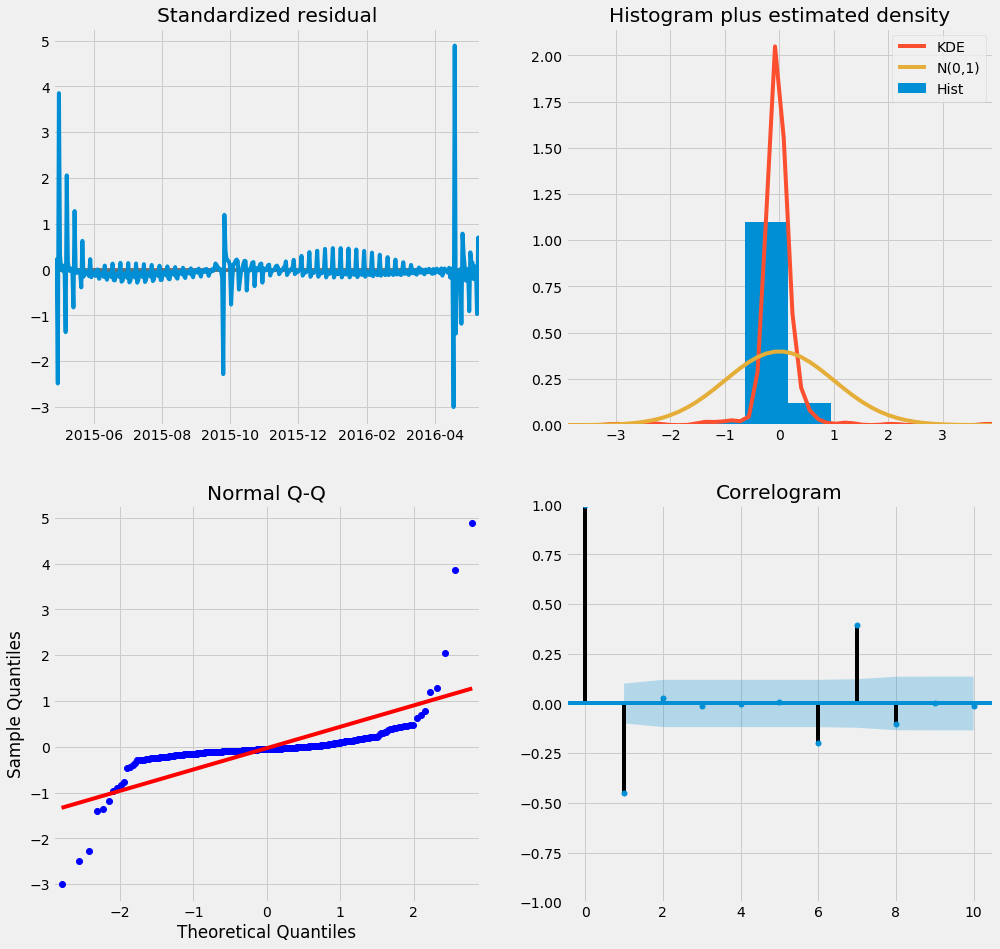

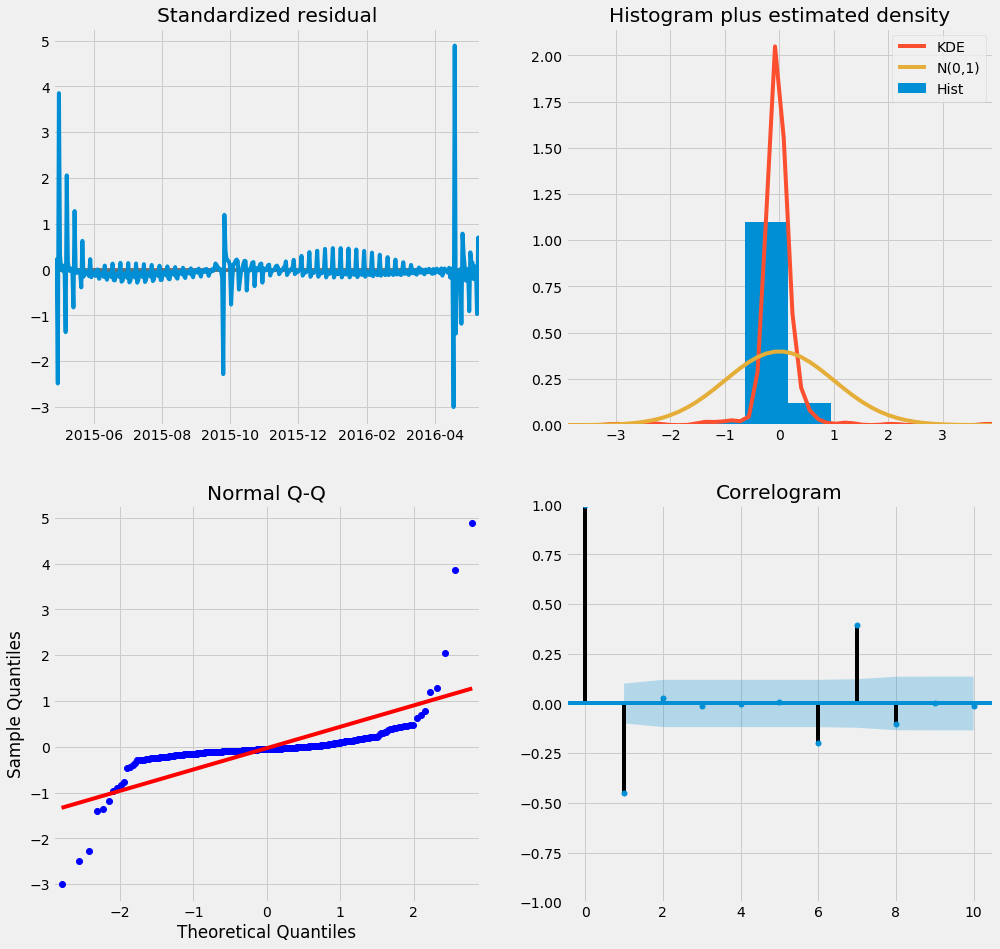

In [127]:
arima3_exog.plot_diagnostics(figsize=[15,15])


In [128]:
print(arima3_exog.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3417.2610    508.420      6.721      0.000    2420.776    4413.746
x2         -1198.6090   7019.933     -0.171      0.864    -1.5e+04    1.26e+04
x3         -3.589e-05    1.4e+04  -2.56e-09      1.000   -2.75e+04    2.75e+04
x4          8.157e+04    469.880    173.596      0.000    8.06e+04    8.25e+04
ma.L1         -0.3530      0.118     -3.001      0.003      -0.584      -0.122
ma.L2         -0.0282      0.267     -0.106      0.916      -0.551       0.495
ma.L3          0.0091      0.517      0.018      0.986      -1.004       1.022
ma.L4          0.0361      0.671      0.054      0.957      -1.279       1.351
ma.L5          0.0658      0.717      0.092      0.927      -1.339       1.470
ma.L6          0.0874      0.249      0.351      0.726      -0.401       0.576
ma.L7         -0.5563      0.346     -1.609      0.1

In [144]:
weather_df = pd.read_csv('daily_weather.csv',parse_dates=[0])

In [145]:
def numna (x):
    return sum(x.isnull())
    

In [146]:
weather_df.apply(numna, axis=0)

date                   0
max_humidex_v        773
max_temperature_v      0
max_wind_speed_v       0
min_temperature_v      0
min_wind_speed_v       0
precipitation_v        0
rain_v                 0
snow_v                 0
snow_on_ground_v       0
dtype: int64

In [147]:
weather_df.drop('max_humidex_v',inplace=True,axis=1)

In [151]:
weather_df.set_index('date',inplace=True)

In [173]:
daydiff_train.index = pd.to_datetime(daydiff_train.index)

In [174]:
daydiff_train.index[0]

Timestamp('2015-01-09 00:00:00')

In [177]:
weather_df['datevalues']=weather_df.index

In [178]:
weather_df.sort_values('datevalues')

,max_temperature_v,max_wind_speed_v,min_temperature_v,min_wind_speed_v,precipitation_v,rain_v,snow_v,snow_on_ground_v,datevalues
2012-01-01,9.6,48,-21.0,0,27.8,23.6,15.0,32,2012-01-01
2012-01-02,12.0,61,-18.9,0,24.4,16.0,24.4,32,2012-01-02
2012-01-03,12.8,46,-19.5,0,32.5,27.4,32.5,32,2012-01-03
2012-01-04,12.4,67,-26.5,0,45.0,45.0,13.0,36,2012-01-04
2012-01-05,13.6,48,-22.2,0,20.8,20.8,13.4,48,2012-01-05
2012-01-06,13.9,64,-25.0,0,18.8,7.0,18.8,53,2012-01-06
2012-01-07,14.3,57,-21.7,0,22.6,22.6,17.8,46,2012-01-07
2012-01-08,14.0,58,-22.2,0,49.4,49.4,8.1,53,2012-01-08
2012-01-09,11.0,48,-22.9,0,17.8,16.8,11.3,51,2012-01-09
2012-01-10,12.2,57,-25.2,0,18.6,18.6,15.0,51,2012-01-10


In [179]:
weather_df.index[0]

Timestamp('2017-08-21 00:00:00')

In [198]:
daydiff_train

,delta,date
date,,
2015-01-09,0.0,2015-01-09
2015-01-10,0.0,2015-01-10
2015-01-11,0.0,2015-01-11
2015-01-12,0.0,2015-01-12
2015-01-13,0.0,2015-01-13
2015-01-14,0.0,2015-01-14
2015-01-15,0.0,2015-01-15
2015-01-16,0.0,2015-01-16
2015-01-17,0.0,2015-01-17


In [208]:
train_dates = weather_df.loc[weather_df.index.isin(daydiff_train.index)]

In [209]:
train_dates = train_dates.sort_values('datevalues')

In [212]:
train_dates.drop('datevalues',axis=1,inplace=True)

In [213]:
weathertrain_array = np.array(train_dates)

In [214]:
daydiff_train.shape

(490, 2)

In [215]:
weathertrain_array

array([[ 11. ,  48. , -22.9, ...,  16.8,  11.3,  51. ],
       [ 12.2,  57. , -25.2, ...,  18.6,  15. ,  51. ],
       [ 11.1,  63. , -24.8, ...,  33.2,  12.8,  61. ],
       ..., 
       [ 28.3,  61. ,  -5. , ...,  29.6,   0.5,   0. ],
       [ 28.2,  54. ,  -3.3, ...,  30. ,   1. ,   0. ],
       [ 28.7,  44. ,  -0.6, ...,  25. ,   0. ,   0. ]])

In [216]:
exogtrain_weather = np.append(exogtrain_array,weathertrain_array,axis=1)

In [217]:
mod4_exog = sm.tsa.statespace.SARIMAX(endog = daydiff_train['delta'],exog=exogtrain_weather,
                                 order = (0,1,7),
                                 seasonal_order = (0,1,13,7),
                                 enforce_stationarity = False,
                                 enforce_invertibility = False)


In [218]:
arima4_exog = mod4_exog.fit()

/Users/MHK/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


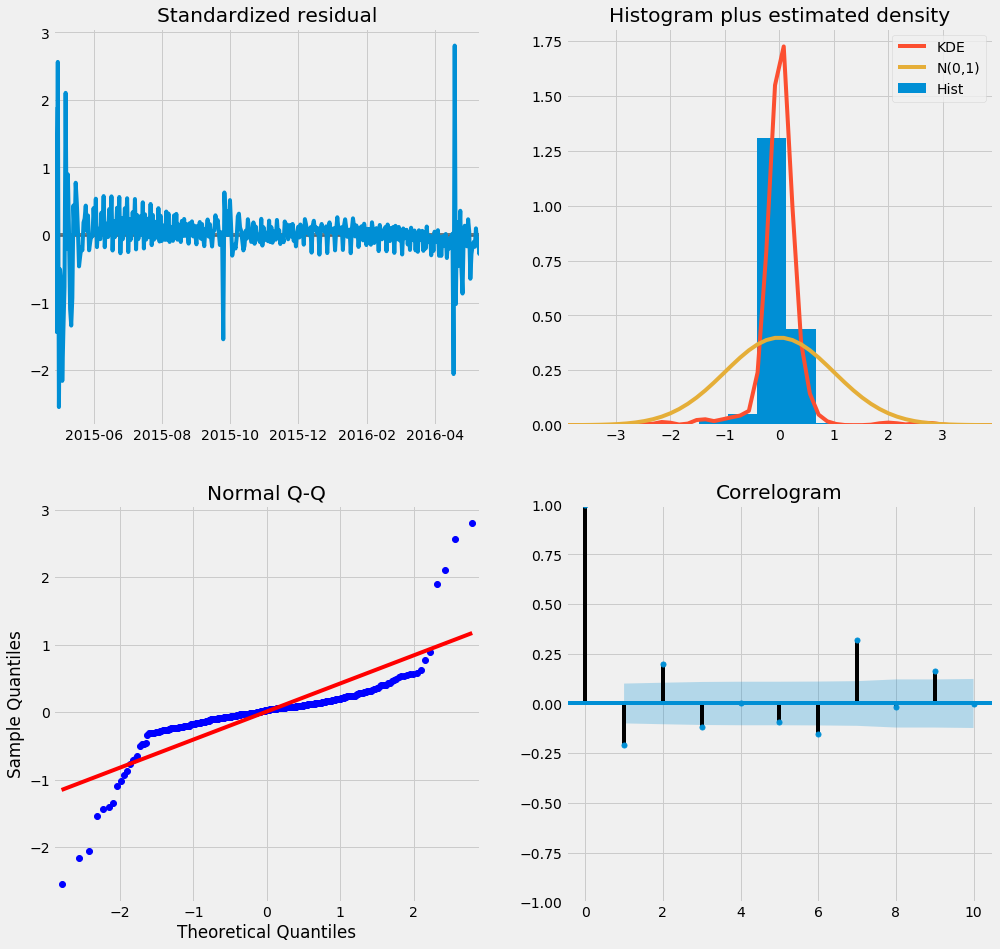

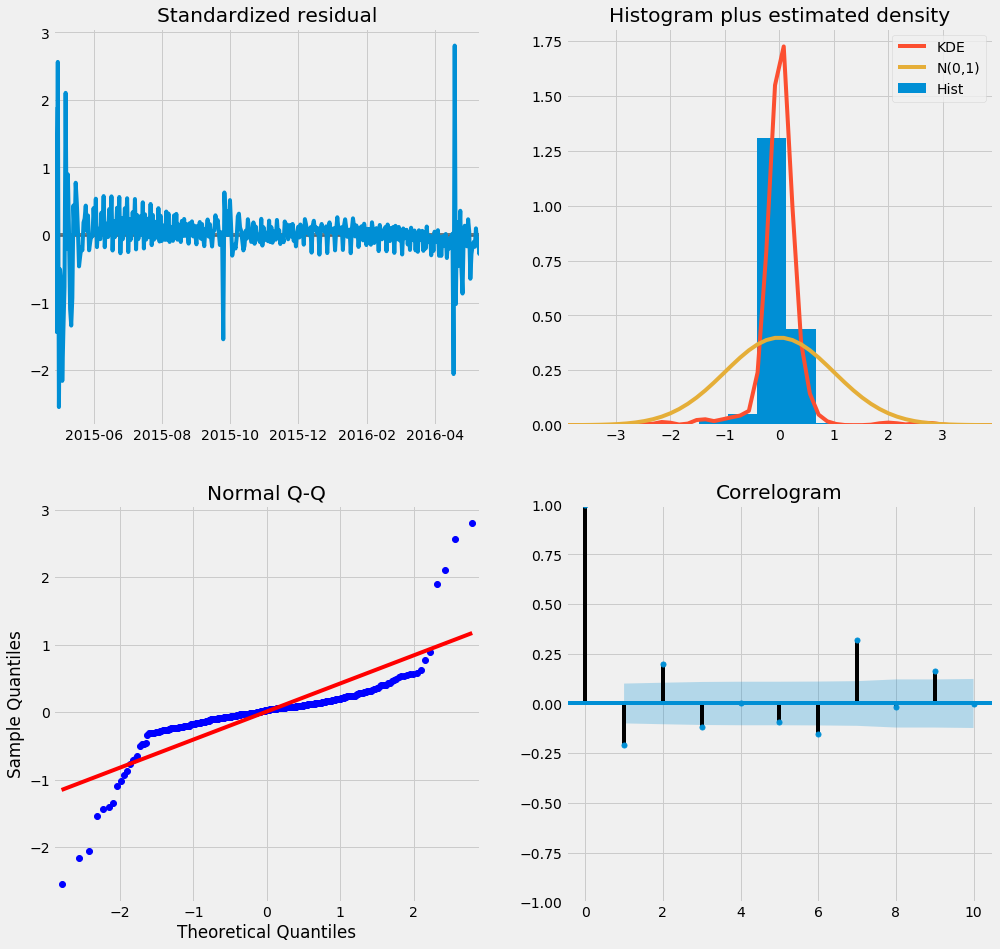

In [219]:
arima4_exog.plot_diagnostics(figsize=[15,15])


In [220]:
print(arima4_exog.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2986.9339        nan        nan        nan         nan         nan
x2         -2875.9444   2.29e+04     -0.126      0.900   -4.77e+04    4.19e+04
x3          2.076e-05   1.94e+04   1.07e-09      1.000    -3.8e+04     3.8e+04
x4          9.361e+04        nan        nan        nan         nan         nan
x5          2.478e+04   4200.602      5.900      0.000    1.66e+04     3.3e+04
x6          1961.2281   1.44e+04      0.136      0.892   -2.63e+04    3.02e+04
x7         -6160.8999   2.08e+04     -0.296      0.767   -4.69e+04    3.46e+04
const      -5.563e-11    304.169  -1.83e-13      1.000    -596.160     596.160
x8          6169.1876   1.64e+04      0.376      0.707    -2.6e+04    3.83e+04
x9         -6681.2289   1.87e+04     -0.357      0.721   -4.33e+04       3e+04
x10        -7427.0448   1.48e+04     -0.500      0.6

/Users/MHK/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/Users/MHK/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/MHK/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/MHK/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [ ]:
pred = arima4_exog.get_prediction(start = '2016-01-01', dynamic = False,full_results=True)